In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier , VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectFromModel
import joblib



In [145]:
df=pd.read_csv('modifed_data.csv')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31566 entries, 0 to 31565
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      30948 non-null  float64
 1   job_type                          31566 non-null  object 
 2   marital                           31416 non-null  object 
 3   education                         31566 non-null  object 
 4   default                           31566 non-null  object 
 5   balance                           31168 non-null  float64
 6   housing_loan                      31566 non-null  object 
 7   personal_loan                     31417 non-null  object 
 8   communication_type                31566 non-null  object 
 9   month                             31566 non-null  object 
 10  num_contacts_in_campaign          31454 non-null  float64
 11  num_contacts_prev_campaign        31566 non-null  int64  
 12  prev

In [147]:
df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,call_dura_in_min,day_month_binned,new_client_contact_this_campaign
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,jun,4.0,0,unknown,0,5.050000,>20,1
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,nov,2.0,1,other,0,2.383333,10:20,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,feb,4.0,0,unknown,0,1.683333,<11,1
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,may,3.0,0,unknown,0,2.116667,10:20,1
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,may,2.0,0,unknown,0,0.816667,10:20,1


In [148]:
df.isnull().mean()*100

customer_age                        1.957803
job_type                            0.000000
marital                             0.475195
education                           0.000000
default                             0.000000
balance                             1.260850
housing_loan                        0.000000
personal_loan                       0.472027
communication_type                  0.000000
month                               0.000000
num_contacts_in_campaign            0.354812
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
term_deposit_subscribed             0.000000
call_dura_in_min                    0.978901
day_month_binned                    0.000000
new_client_contact_this_campaign    0.000000
dtype: float64

In [149]:
df['num_contacts_in_campaign'].sort_values(ascending=False).value_counts()

1.0     12251
2.0      8651
3.0      3835
4.0      2430
5.0      1250
6.0       863
7.0       521
8.0       374
9.0       234
10.0      188
11.0      145
12.0      112
13.0      110
14.0       57
16.0       56
15.0       54
17.0       53
20.0       32
19.0       31
18.0       30
21.0       21
25.0       19
23.0       16
24.0       15
28.0       13
22.0       13
29.0       12
26.0        9
32.0        8
27.0        7
31.0        7
30.0        6
33.0        5
34.0        4
35.0        3
36.0        3
38.0        3
43.0        3
37.0        2
41.0        2
51.0        1
55.0        1
58.0        1
46.0        1
44.0        1
63.0        1
Name: num_contacts_in_campaign, dtype: int64

<AxesSubplot:xlabel='num_contacts_in_campaign', ylabel='Density'>

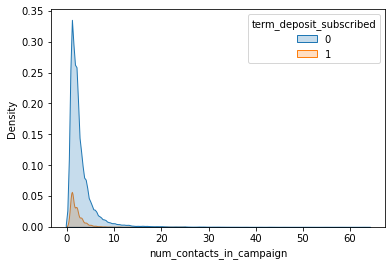

In [150]:
sns.kdeplot(data=df , x='num_contacts_in_campaign' , hue='term_deposit_subscribed',shade=True)

In [151]:
df[df['num_contacts_in_campaign']>9].term_deposit_subscribed.value_counts()

0    1006
1      39
Name: term_deposit_subscribed, dtype: int64

In [152]:
df[df['num_contacts_in_campaign']>9].index

Int64Index([   39,    43,    59,    60,    63,    71,    84,    96,   111,
              122,
            ...
            31264, 31295, 31443, 31448, 31460, 31481, 31518, 31543, 31544,
            31565],
           dtype='int64', length=1045)

In [153]:
df.drop(df[df['num_contacts_in_campaign']>9].index ,axis=0, inplace=True)

In [154]:
df.reset_index(drop='frist',inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30521 entries, 0 to 30520
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      29923 non-null  float64
 1   job_type                          30521 non-null  object 
 2   marital                           30375 non-null  object 
 3   education                         30521 non-null  object 
 4   default                           30521 non-null  object 
 5   balance                           30140 non-null  float64
 6   housing_loan                      30521 non-null  object 
 7   personal_loan                     30374 non-null  object 
 8   communication_type                30521 non-null  object 
 9   month                             30521 non-null  object 
 10  num_contacts_in_campaign          30409 non-null  float64
 11  num_contacts_prev_campaign        30521 non-null  int64  
 12  prev

In [156]:
df.isnull().mean()*100

customer_age                        1.959307
job_type                            0.000000
marital                             0.478359
education                           0.000000
default                             0.000000
balance                             1.248321
housing_loan                        0.000000
personal_loan                       0.481636
communication_type                  0.000000
month                               0.000000
num_contacts_in_campaign            0.366960
num_contacts_prev_campaign          0.000000
prev_campaign_outcome               0.000000
term_deposit_subscribed             0.000000
call_dura_in_min                    0.986206
day_month_binned                    0.000000
new_client_contact_this_campaign    0.000000
dtype: float64

In [157]:
 df.select_dtypes('number').columns

Index(['customer_age', 'balance', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign', 'term_deposit_subscribed',
       'call_dura_in_min', 'new_client_contact_this_campaign'],
      dtype='object')

C:\myanaconda\envs\Epsilon_noor\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


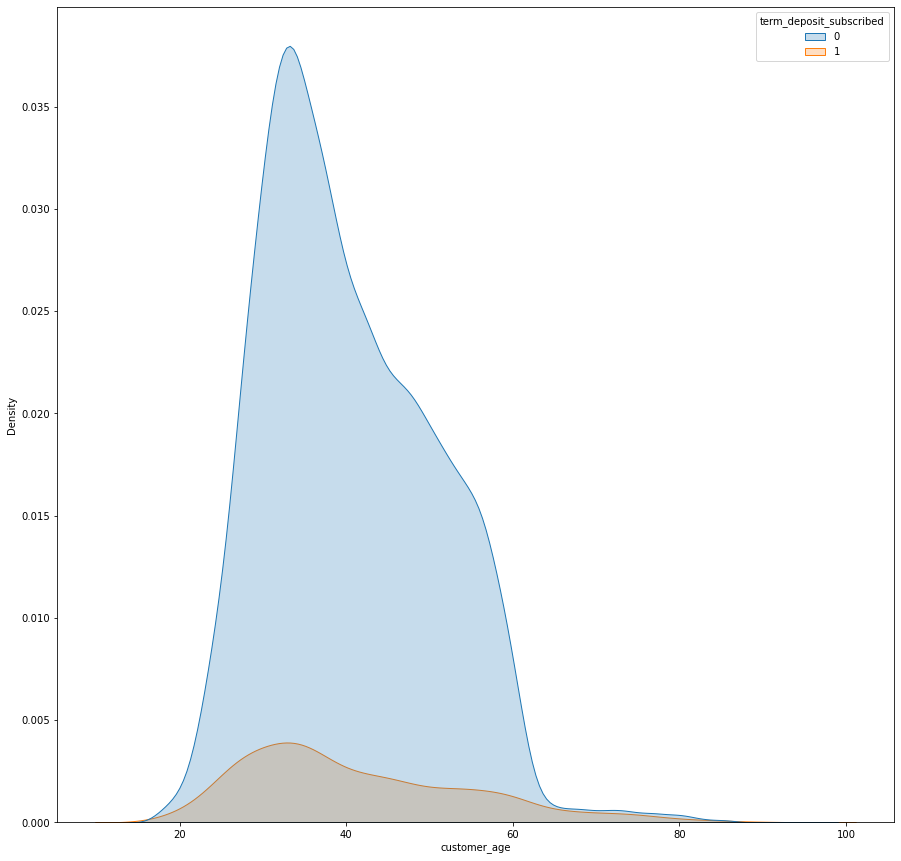

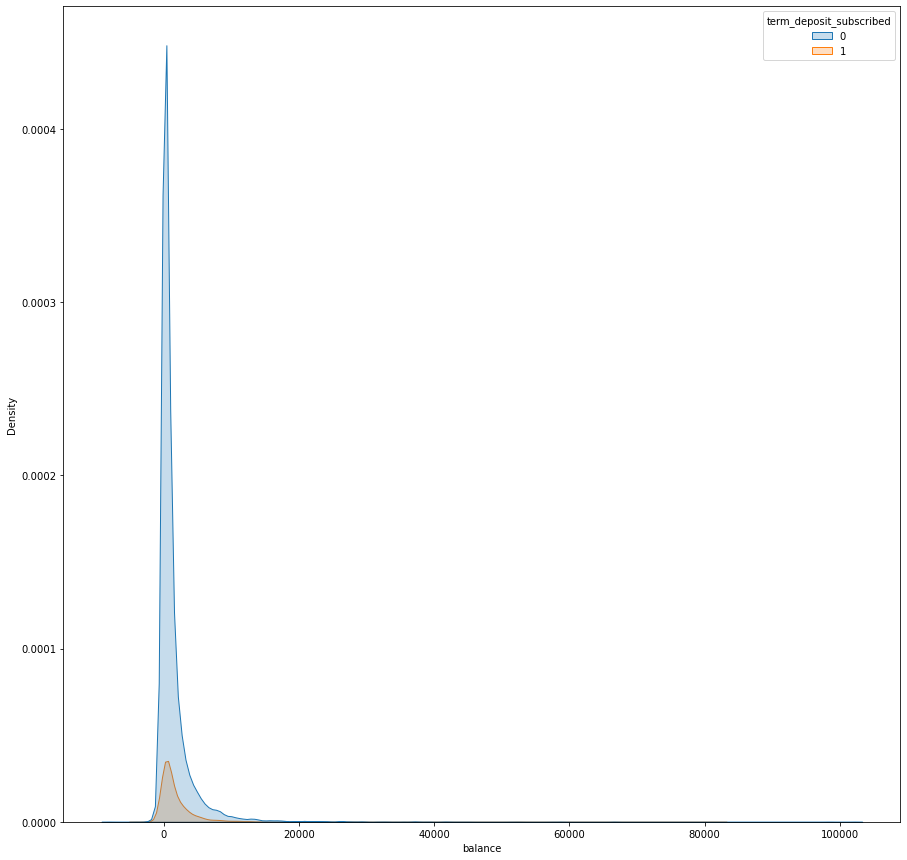

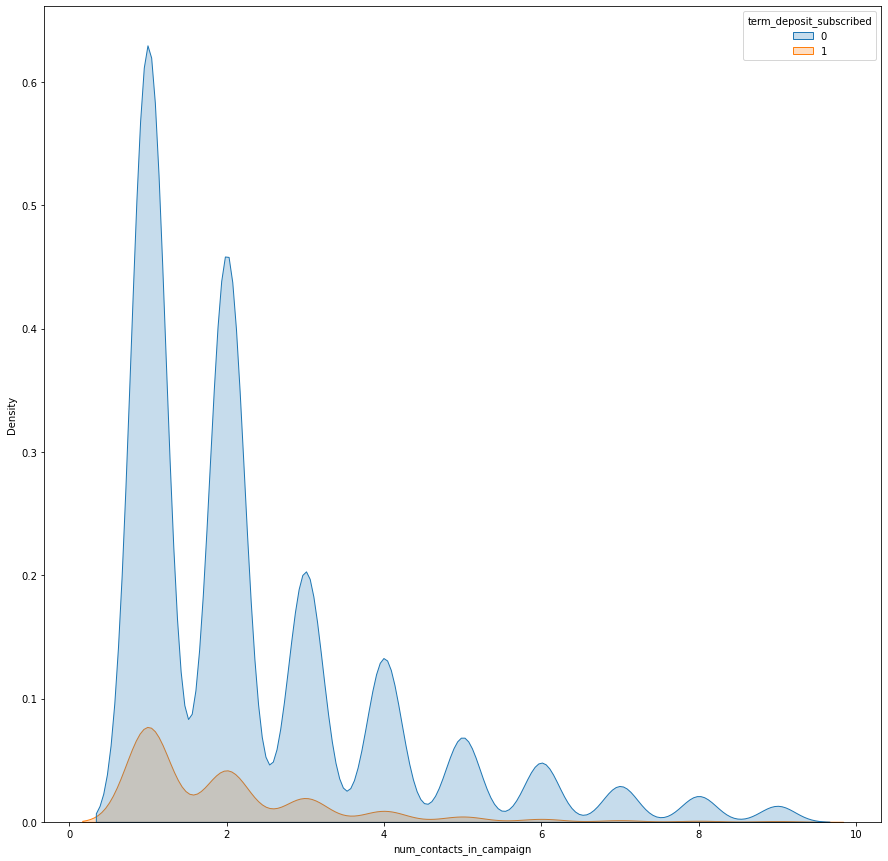

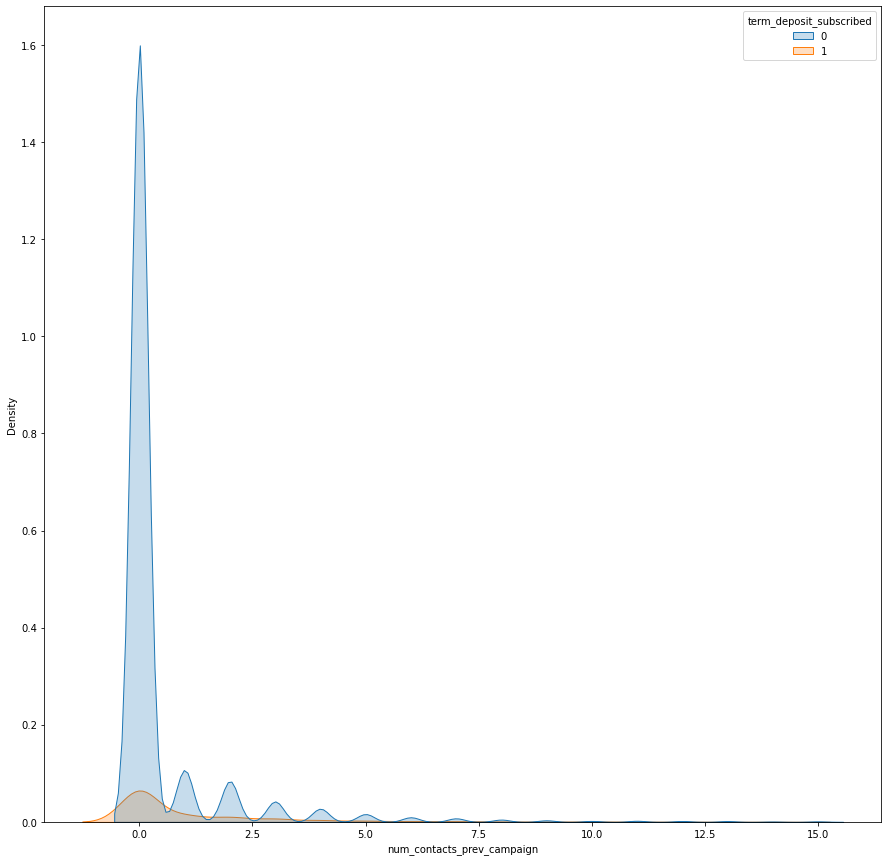

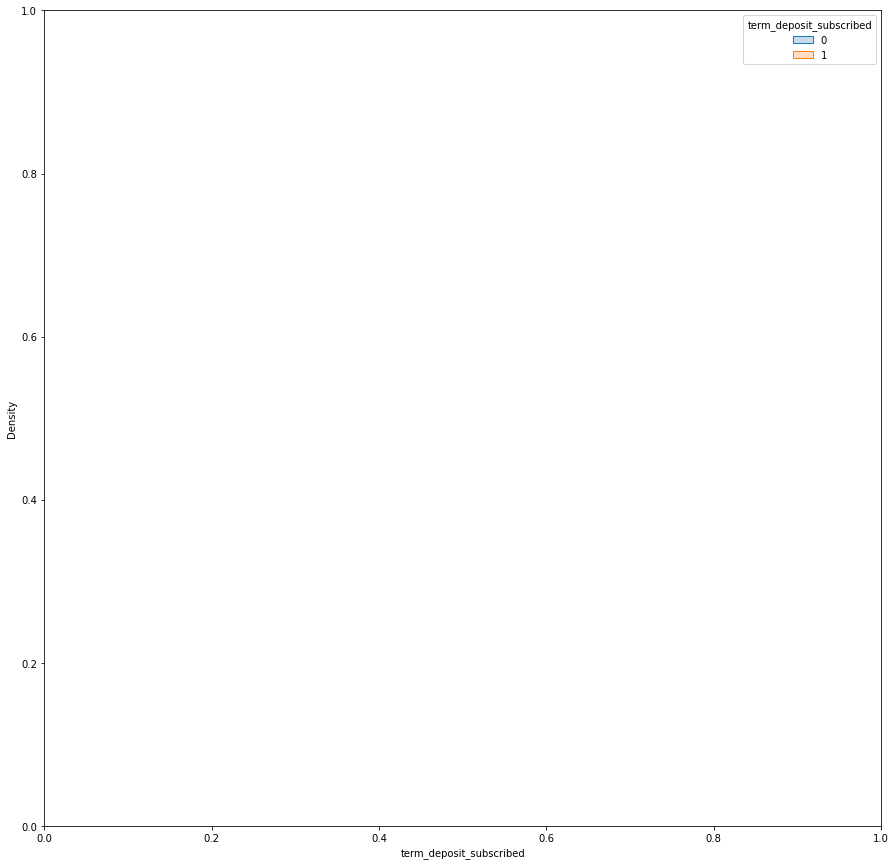

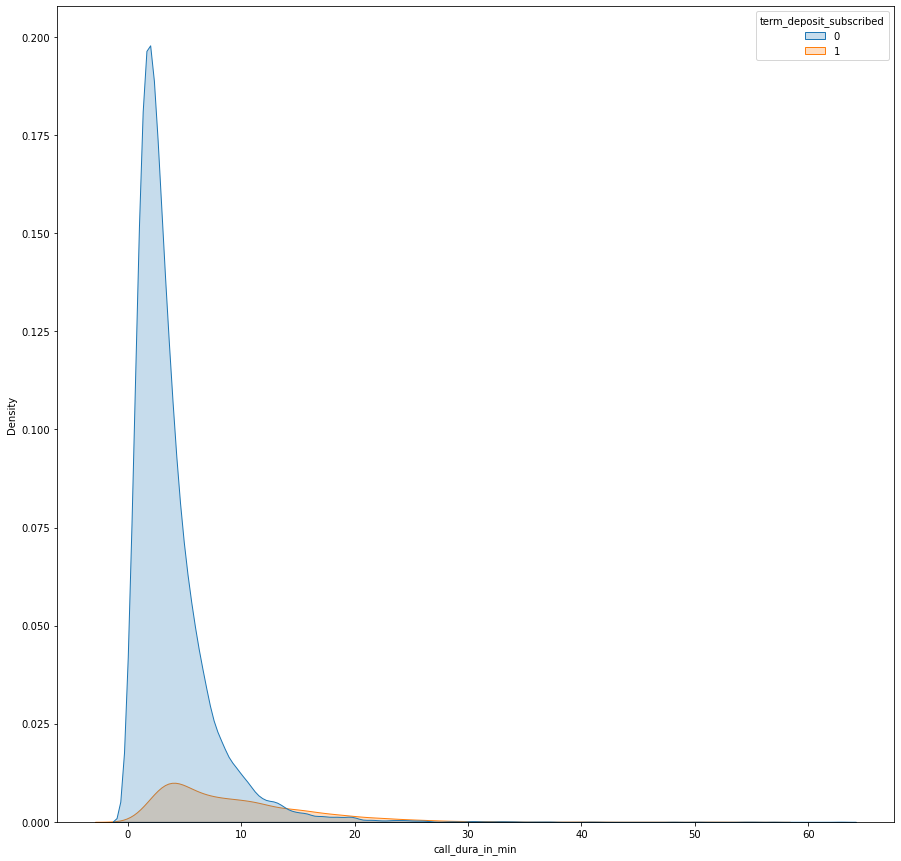

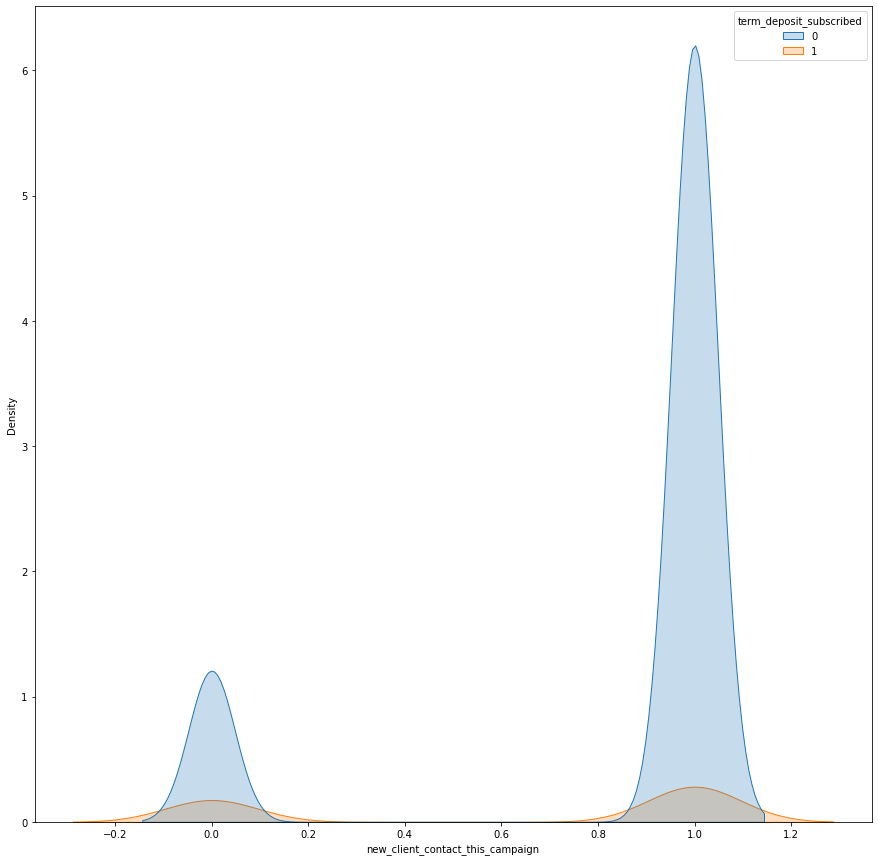

In [158]:
for col in df.select_dtypes('number').columns :
    plt.figure(figsize = (15, 15))
    sns.kdeplot(data=df , x=col , hue='term_deposit_subscribed',shade=True)

In [159]:
df['term_deposit_subscribed'].value_counts() # traget 8:1 highiy imbalanced

0    27176
1     3345
Name: term_deposit_subscribed, dtype: int64

In [160]:
num_col=['customer_age', 'balance','num_contacts_in_campaign','call_dura_in_min']

In [161]:
 df.select_dtypes('object').columns

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome',
       'day_month_binned'],
      dtype='object')

In [162]:
cat_col=['personal_loan', 'marital'] 

In [163]:
x=df.drop(['term_deposit_subscribed'] , axis=1)
y=df['term_deposit_subscribed']

## Create  pipeline

In [164]:
steps_1=list()
steps_1.append(('imputer',  SimpleImputer(strategy='most_frequent')))
steps_1.append(('Encoder',OneHotEncoder(sparse=False , drop='first') ))
pipline_1= Pipeline(steps=steps_1)

In [165]:
pipline_1

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('Encoder', OneHotEncoder(drop='first', sparse=False))])

In [166]:
col_trasformer= ColumnTransformer(transformers=[('category_trans_1',pipline_1, cat_col), ('num_trans', KNNImputer(),num_col),
                                                ('category_trans_2',BinaryEncoder(),['job_type', 'education', 'default', 'housing_loan','communication_type', 'month', 'prev_campaign_outcome','day_month_binned'])]
                                  ,remainder='passthrough')

In [63]:
# for this try i use  min max scaler cause naive bayesd algorithims

In [64]:
models = list()
models.append(("CART" , DecisionTreeClassifier(max_depth=6 , max_leaf_nodes=10 , max_features=5)))
models.append(("MNB" , MultinomialNB()))
models.append(("GNB" , GaussianNB()))
models.append(("LR" , LogisticRegression(max_iter=1000)))
models.append(("XG" , XGBClassifier(n_estimators=10)))
models.append(("RF" , RandomForestClassifier(n_estimators=20)))
models.append(('XTC', ExtraTreesClassifier(max_features=4,n_estimators=20 )))
models.append(("Voting" , VotingClassifier(estimators=[("LR" , LogisticRegression()),("GNB" , GaussianNB()),
                                                       ("CART" , DecisionTreeClassifier(max_depth=6 , max_leaf_nodes=10 , max_features=5)) ,
                                                       ("XG" , XGBClassifier(n_estimators=10)) ,
                                                       ('XTC', ExtraTreesClassifier(max_features=4,n_estimators=20 )),
                                                       ("RF" , RandomForestClassifier(n_estimators=20))]))  )

In [66]:
for model in models:
    steps=list()
    steps.append(('col_trans',col_trasformer ))
    steps.append(("Scaler" , MinMaxScaler()))
    steps.append(('ROS',SMOTE(sampling_strategy=0.2)))
    steps.append(('RUS',RandomUnderSampler(sampling_strategy=0.5)))
    steps.append(model)
    pipeline = Pipeline(steps)
    scores = cross_validate(pipeline , x , y , cv = 5  , scoring="f1" , return_train_score=True,)
    print(model[0])
    print("train_f1", scores["train_score"].mean())
    print("test_f1" , scores["test_score"].mean())
    print("-" * 25)


CART
train_f1 0.42543933203900774
test_f1 0.423658285839793
-------------------------
MNB
train_f1 0.40088377276148285
test_f1 0.4030124785305957
-------------------------
GNB
train_f1 0.44203798969918856
test_f1 0.44086776590719934
-------------------------
LR
train_f1 0.5819628675336271
test_f1 0.5749619706477345
-------------------------
XG
train_f1 0.6360332120358354
test_f1 0.608798068655652
-------------------------
RF
train_f1 0.8366773920786066
test_f1 0.6141382575945856
-------------------------
XTC
train_f1 0.8603331350535465
test_f1 0.5660313845405346
-------------------------


C:\myanaconda\envs\Epsilon_noor\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\myanaconda\envs\Epsilon_noor\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Voting
train_f1 0.7119247095213086
test_f1 0.6014676059156047
-------------------------


In [67]:
# with RobustScaler

In [70]:
models = list()
models.append(("CART" , DecisionTreeClassifier(max_depth=6 , max_leaf_nodes=10 , max_features=5)))
#models.append(("MNB" , MultinomialNB()))
#models.append(("GNB" , GaussianNB()))
models.append(("LR" , LogisticRegression(max_iter=1000)))
models.append(("XG" , XGBClassifier(n_estimators=10)))
models.append(("RF" , RandomForestClassifier(n_estimators=20)))
models.append(('XTC', ExtraTreesClassifier(max_features=4,n_estimators=20 )))
models.append(("Voting" , VotingClassifier(estimators=[("LR" , LogisticRegression()),("GNB" , GaussianNB()),
                                                       ("CART" , DecisionTreeClassifier(max_depth=6 , max_leaf_nodes=10 , max_features=5)) ,
                                                       ("XG" , XGBClassifier(n_estimators=10)) ,
                                                       ('XTC', ExtraTreesClassifier(max_features=4,n_estimators=20 )),
                                                       ("RF" , RandomForestClassifier(n_estimators=20))]))  )

In [71]:
for model in models:
    steps=list()
    steps.append(('col_trans',col_trasformer ))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(('ROS',SMOTE(sampling_strategy=0.2)))
    steps.append(('RUS',RandomUnderSampler(sampling_strategy=0.5)))
    steps.append(model)
    pipeline = Pipeline(steps)
    scores = cross_validate(pipeline , x , y , cv = 5  , scoring="f1" , return_train_score=True,)
    print(model[0])
    print("train_f1", scores["train_score"].mean())
    print("test_f1" , scores["test_score"].mean())
    print("-" * 25)


CART
train_f1 0.4254815377378508
test_f1 0.42160217680491596
-------------------------
LR
train_f1 0.5831292380264759
test_f1 0.5814070527125423
-------------------------
XG
train_f1 0.639935462769412
test_f1 0.6119358062145785
-------------------------
RF
train_f1 0.8397427684198464
test_f1 0.6141738082447677
-------------------------
XTC
train_f1 0.8622585502645137
test_f1 0.5658517633261233
-------------------------


C:\myanaconda\envs\Epsilon_noor\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\myanaconda\envs\Epsilon_noor\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Voting
train_f1 0.719484974512013
test_f1 0.6007703832867127
-------------------------


## I choose Random forest cause it has more prameter can be tunned 

In [222]:
params = [
    
    { "Model__criterion" : ["gini", "entropy"] ,  "Model__max_depth" : range(14 ,18 ), "Model__n_estimators":range(30 , 50, 5 )}
]

In [223]:
steps=list()
steps.append(('col_trans',col_trasformer ))
steps.append(("Scaler" , RobustScaler()))
steps.append(('ROS',SMOTE(sampling_strategy=0.2)))
steps.append(('RUS',RandomUnderSampler(sampling_strategy=0.5)))
steps.append(('emd',SelectFromModel(estimator=RandomForestClassifier( ))))
steps.append(("Model" , RandomForestClassifier( )))
pipeline = Pipeline(steps)
grid = GridSearchCV(estimator =pipeline ,param_grid = params , cv = 5  , scoring="f1" , return_train_score=True,)
grid.fit(x,y)
grid.best_params_


{'Model__criterion': 'gini', 'Model__max_depth': 14, 'Model__n_estimators': 40}

In [224]:
grid.best_estimator_

Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category_trans_1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['personal_loan', 'marital']),
                                                 ('num_trans', KNNImputer(),
                                                  ['customer_age', 'balance',
                                                   'num_contacts_in_campaign',
                                                   'call_dura_in_...
                                                  ['job_type', 'education',
                                                   'default', 'housing_loan',
                                                   'communication_type',
                                                   'month',
                                                   'prev_campaign_outcome',
                                                   'day_month_binned'])])),
                ('Scaler', RobustScaler()),
                ('ROS', SMOTE(sampling_strategy=0.2)),
                ('RUS', RandomUnderSampler(sampling_strategy=0.5)),
                ('emd', SelectFromModel(estimator=RandomForestClassifier())),
                ('Model',
                 RandomForestClassifier(max_depth=14, n_estimators=40))])

In [227]:
final_pipeline=grid.best_estimator_

In [229]:
scores = cross_validate(final_pipeline , x , y , cv = 5  , scoring="f1" , return_train_score=True,)
print("train_f1", scores["train_score"].mean())
print("test_f1" , scores["test_score"].mean())

train_f1 0.6745007081213661
test_f1 0.5454629551846326


In [230]:
scores = cross_validate(final_pipeline , x , y , cv = 5  , scoring="accuracy" , return_train_score=True,)
print("train_accu", scores["train_score"].mean())
print("test_accu" , scores["test_score"].mean())

train_accu 0.9172783099387548
test_accu 0.8790666825529211


In [231]:
x.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'month', 'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'call_dura_in_min', 'day_month_binned',
       'new_client_contact_this_campaign'],
      dtype='object')

In [232]:
joblib.dump(final_pipeline , "final_pipeline_Model.h5")
joblib.dump(x.columns,"final_input.h5")

['final_input.h5']

In [225]:
scores = cross_validate(final_pipeline , x , y , cv = 5  , scoring="f1" , return_train_score=True,)
print("train_f1", scores["train_score"].mean())
print("test_f1" , scores["test_score"].mean())

Voting
train_f1 0.6974667856645537
test_f1 0.5415610983923924


In [226]:
scores = cross_validate(final_pipeline , x , y , cv = 5  , scoring="accuracy" , return_train_score=True,)
print(model[0])
print("train_accu", scores["train_score"].mean())
print("test_accu" , scores["test_score"].mean())

Voting
train_accu 0.9230857663625309
test_accu 0.8800169435490537
